<a href="https://colab.research.google.com/github/LeVargas97/LeoCode/blob/main/Atividade_Sinistros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import pyperclip
from matplotlib.backends.backend_pdf import PdfPages


In [47]:
# Substitua 'caminho/do/seu/arquivo.csv' pelo caminho real do seu arquivo
file_path = 'sinistros_seguros.csv'

df = pd.read_csv(file_path)
print("Arquivo carregado com sucesso!");


Arquivo carregado com sucesso!


In [48]:
print(df.head())

  Data_Sinistro      Produto_Seguro  Quantidade_Sinistros  Valor_Indenizacao
0    2023-11-24         Seguro Auto                     7           35554.97
1    2023-02-27         Seguro Vida                     4           24342.52
2    2023-01-13  Seguro Residencial                     8           19210.39
3    2023-05-21         Seguro Auto                     5           35401.68
4    2023-05-06         Seguro Auto                     7           12811.85


In [49]:
print(df.isnull().sum())

Data_Sinistro           0
Produto_Seguro          0
Quantidade_Sinistros    0
Valor_Indenizacao       0
dtype: int64


In [15]:
df['Data_Sinistro'] = pd.to_datetime(df['Data_Sinistro'])


In [17]:
df['Mes'] = df['Data_Sinistro'].dt.month

In [21]:
df['Tipo_Seguro'] = df['Produto_Seguro'].apply(lambda x:'Automovel' if 'auto' in x.lower() else ('Residencial'if 'resid'in x.lower() else 'Vida'))

In [42]:
print(df.describe)

<bound method NDFrame.describe of     Data_Sinistro      Produto_Seguro  Quantidade_Sinistros  \
0      2023-11-24         Seguro Auto                     7   
1      2023-02-27         Seguro Vida                     4   
2      2023-01-13  Seguro Residencial                     8   
3      2023-05-21         Seguro Auto                     5   
4      2023-05-06         Seguro Auto                     7   
..            ...                 ...                   ...   
495    2023-10-02         Seguro Vida                     7   
496    2023-06-19         Seguro Auto                     9   
497    2023-01-15         Seguro Auto                     4   
498    2023-03-01         Seguro Auto                     4   
499    2023-05-14         Seguro Auto                     6   

     Valor_Indenizacao  Mes  Tipo_Seguro  
0             35554.97   11    Automovel  
1             24342.52    2         Vida  
2             19210.39    1  Residencial  
3             35401.68    5    Automo

In [43]:
valor_indenizacao = df['Valor_Indenizacao']
media_indenizacao = valor_indenizacao.mean()
media_indenizacao = valor_indenizacao.median()
desvio_padrao_indenizacao = valor_indenizacao.std()

print("\nEstatisticas Valor das Indenizações")
print(f"Média: {media_indenizacao}")
print(f"Mediana: {media_indenizacao}")
print(f"Desvio Padrão: {desvio_padrao_indenizacao}")


Estatisticas Valor das Indenizações
Média: 26491.97
Mediana: 26491.97
Desvio Padrão: 13708.424622987786


In [45]:
frenquencia_sinistros_mensal = df.groupby(["Mes", "Tipo_Seguro"])["Valor_Indenizacao"].count().unstack()
print(frenquencia_sinistros_mensal)

Tipo_Seguro  Automovel  Residencial  Vida
Mes                                      
1                   12           17    13
2                   14           12    26
3                   15           10    16
4                   14           18    12
5                   19           25    10
6                    5           16    11
7                   15           14    11
8                    8           12    17
9                   11            8    11
10                  17           17    16
11                  10           13    14
12                  10           17    14


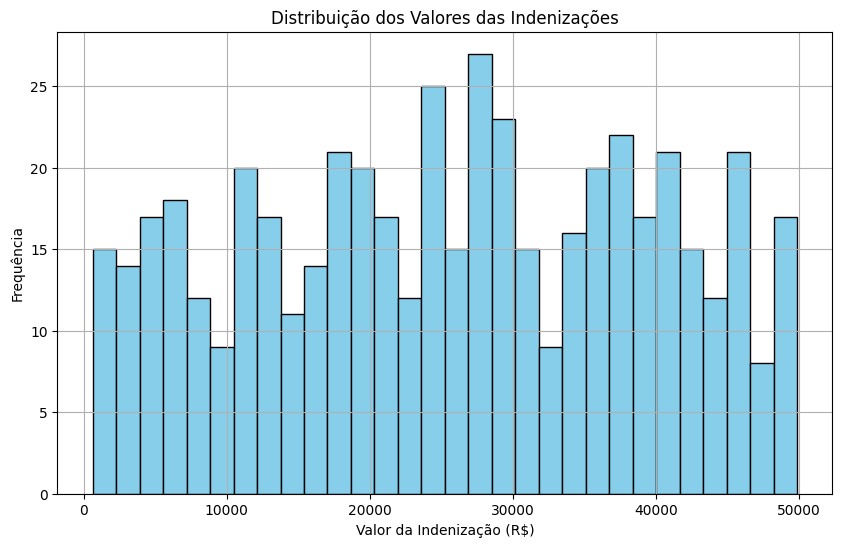

In [52]:
plt.figure(figsize=(10, 6))
df['Valor_Indenizacao'].hist(bins=30, color = 'skyblue', edgecolor='black')
plt.title('Distribuição dos Valores das Indenizações')
plt.xlabel('Valor da Indenização (R$)')
plt.ylabel('Frequência')
plt.show()

<Figure size 1000x600 with 0 Axes>

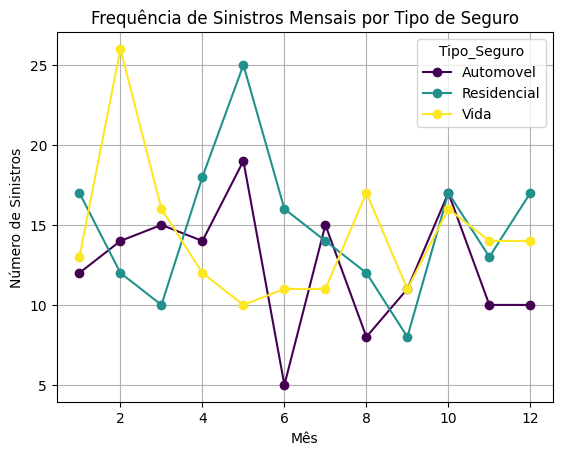

In [58]:
plt.figure(figsize=(10, 6))
frenquencia_sinistros_mensal.plot(kind='line', marker='o', linestyle='-', colormap='viridis')
plt.title('Frequência de Sinistros Mensais por Tipo de Seguro')
plt.xlabel('Mês')
plt.ylabel('Número de Sinistros')
plt.grid(True)
plt.show()

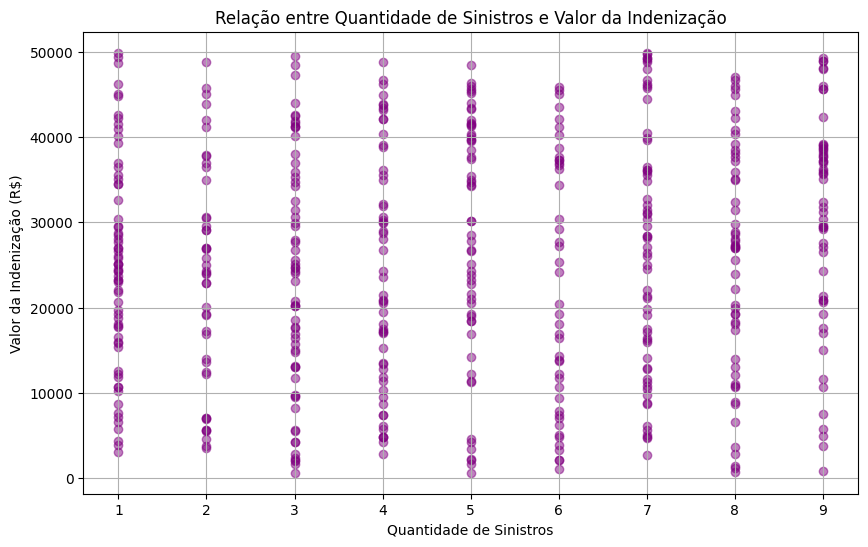

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantidade_Sinistros'], df['Valor_Indenizacao'], alpha=0.5, color='purple')
plt.title('Relação entre Quantidade de Sinistros e Valor da Indenização')
plt.xlabel('Quantidade de Sinistros')
plt.ylabel('Valor da Indenização (R$)')
plt.grid(True)
plt.show()